In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [34]:
# Load the dataset
data = pd.read_csv("biopics.csv")
data

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
0,10 Rillington Place,http://www.imdb.com/title/tt0066730/,UK,1971,-,Richard Fleischer,1,John Christie,Criminal,Unknown,NaN,0,Male,Richard Attenborough
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,$56.7M,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
2,127 Hours,http://www.imdb.com/title/tt1542344/,US/UK,2010,$18.3M,Danny Boyle,1,Aron Ralston,Athlete,Unknown,NaN,0,Male,James Franco
3,1987,http://www.imdb.com/title/tt2833074/,Canada,2014,-,Ricardo Trogi,1,Ricardo Trogi,Other,Known,White,0,Male,Jean-Carl Boucher
4,20 Dates,http://www.imdb.com/title/tt0138987/,US,1998,$537K,Myles Berkowitz,1,Myles Berkowitz,Other,Unknown,NaN,0,Male,Myles Berkowitz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Young Man with a Horn,http://www.imdb.com/title/tt0043153/,US,1950,-,Michael Curtiz,1,Bix Beiderbecke,Musician,Known,White,0,Male,Kirk Douglas
757,Young Mr. Lincoln,http://www.imdb.com/title/tt0032155/,US,1939,-,John Ford,1,Abraham Lincoln,World leader,Known,White,0,Male,Henry Fonda
758,Young Tom Edison,http://www.imdb.com/title/tt0033289/,US,1940,-,Norman Taurog,1,Thomas Edison,Other,Known,White,0,Male,Mickey Rooney
759,Young Winston,http://www.imdb.com/title/tt0069528/,US,1972,-,Richard Attenborough,1,Winston Churchill,World leader,Known,White,0,Male,Simon Ward


In [35]:
# Preprocess the dataset
def convert_box_office(value):
    if value[-1] == "K":
        return float(value[1:-1]) * 1e3
    elif value[-1] == "M":
        return float(value[1:-1]) * 1e6
    else:
        return np.nan

In [36]:
data["box_office"] = data["box_office"].apply(convert_box_office)

# Drop rows with missing values
data = data.dropna()

data

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,race_known,subject_race,person_of_color,subject_sex,lead_actor_actress
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,Known,African American,1,Male,Chiwetel Ejiofor
5,21,http://www.imdb.com/title/tt0478087/,US,2008,81200000.0,Robert Luketic,1,Jeff Ma,Other,Known,Asian American,1,Male,Jim Sturgess
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,1130000.0,Michael Winterbottom,1,Tony Wilson,Musician,Known,White,0,Male,Steve Coogan
7,42,http://www.imdb.com/title/tt0453562/,US,2013,95000000.0,Brian Helgeland,1,Jackie Robinson,Athlete,Known,African American,1,Male,Chadwick Boseman
12,A Dangerous Method,http://www.imdb.com/title/tt1571222/,Canada/UK,2011,5700000.0,David Cronenberg,3,Carl Gustav Jung,Academic,Known,White,0,Male,Michael Fassbender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Wild Bill,http://www.imdb.com/title/tt0114938/,US,1995,2170000.0,Walter Hill,1,Wild Bill Hickok,Historical,Known,White,0,Male,Jeff Bridges
743,Wilde,http://www.imdb.com/title/tt0120514/,UK,1997,2160000.0,Brian Gilbert,1,Oscar Wilde,Author,Known,White,0,Male,Stephen Fry
744,Wilson,http://www.imdb.com/title/tt0037465/,US,1944,2000000.0,Henry King,1,Woodrow Wilson,World leader,Known,White,0,Male,Alexander Knox
748,Without Limits,http://www.imdb.com/title/tt0119934/,US,1998,777000.0,Robert Towne,1,Steve Prefontaine,Athlete,Known,White,0,Male,Billy Crudup


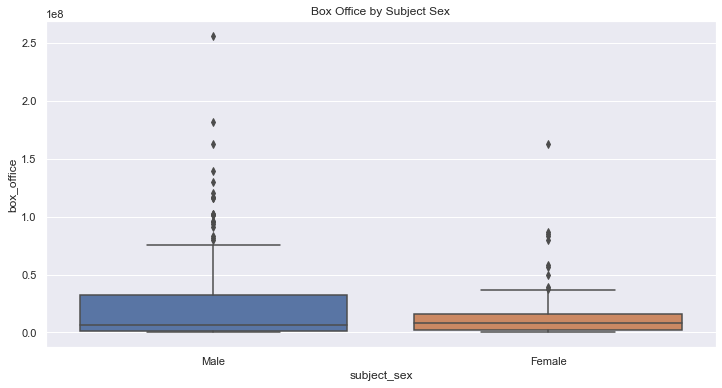

In [37]:
# Visualizations
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
sns.boxplot(x="subject_sex", y="box_office", data=data)
plt.title("Box Office by Subject Sex")
plt.show()

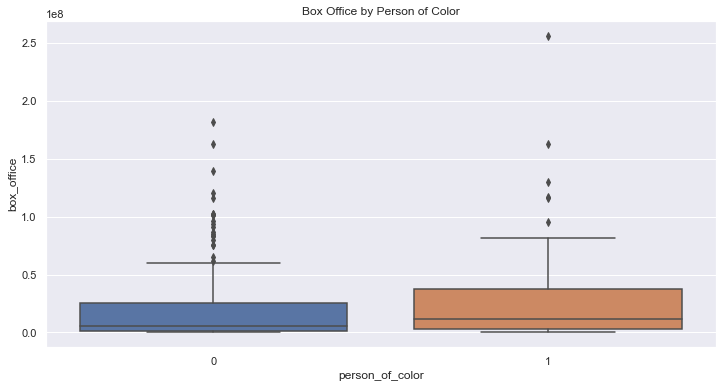

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="person_of_color", y="box_office", data=data)
plt.title("Box Office by Person of Color")
plt.show()

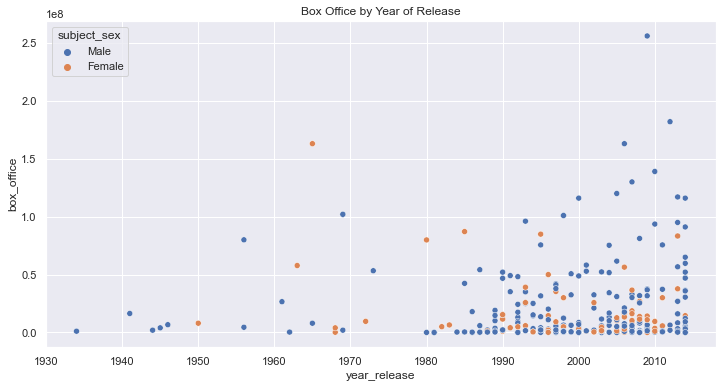

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="year_release", y="box_office", hue="subject_sex", data=data)
plt.title("Box Office by Year of Release")
plt.show()

In [40]:
# One-hot encoding for categorical columns
data = pd.get_dummies(data, columns=["subject_sex", "person_of_color", "race_known"], drop_first=True)
data

,title,site,country,year_release,box_office,director,number_of_subjects,subject,type_of_subject,subject_race,lead_actor_actress,subject_sex_Male,person_of_color_1
1,12 Years a Slave,http://www.imdb.com/title/tt2024544/,US/UK,2013,56700000.0,Steve McQueen,1,Solomon Northup,Other,African American,Chiwetel Ejiofor,1,1
5,21,http://www.imdb.com/title/tt0478087/,US,2008,81200000.0,Robert Luketic,1,Jeff Ma,Other,Asian American,Jim Sturgess,1,1
6,24 Hour Party People,http://www.imdb.com/title/tt0274309/,UK,2002,1130000.0,Michael Winterbottom,1,Tony Wilson,Musician,White,Steve Coogan,1,0
7,42,http://www.imdb.com/title/tt0453562/,US,2013,95000000.0,Brian Helgeland,1,Jackie Robinson,Athlete,African American,Chadwick Boseman,1,1
12,A Dangerous Method,http://www.imdb.com/title/tt1571222/,Canada/UK,2011,5700000.0,David Cronenberg,3,Carl Gustav Jung,Academic,White,Michael Fassbender,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,Wild Bill,http://www.imdb.com/title/tt0114938/,US,1995,2170000.0,Walter Hill,1,Wild Bill Hickok,Historical,White,Jeff Bridges,1,0
743,Wilde,http://www.imdb.com/title/tt0120514/,UK,1997,2160000.0,Brian Gilbert,1,Oscar Wilde,Author,White,Stephen Fry,1,0
744,Wilson,http://www.imdb.com/title/tt0037465/,US,1944,2000000.0,Henry King,1,Woodrow Wilson,World leader,White,Alexander Knox,1,0
748,Without Limits,http://www.imdb.com/title/tt0119934/,US,1998,777000.0,Robert Towne,1,Steve Prefontaine,Athlete,White,Billy Crudup,1,0


In [43]:
# Split the dataset into train and test sets
X = data.drop(['title', 'site', 'box_office', 'country', 'director', 
               'subject', 'type_of_subject', 'lead_actor_actress', 'subject_race'], axis=1)
y = data['box_office']

In [49]:
X

,year_release,number_of_subjects,subject_sex_Male,person_of_color_1
1,2013,1,1,1
5,2008,1,1,1
6,2002,1,1,0
7,2013,1,1,1
12,2011,3,1,0
...,...,...,...,...
742,1995,1,1,0
743,1997,1,1,0
744,1944,1,1,0
748,1998,1,1,0


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)

linear_RMSE = np.sqrt(mean_squared_error(y_test, linear_predictions))
linear_R_squared = r2_score(y_test, linear_predictions)

print(f"RMSE for Linear Regression: {linear_RMSE}")
print(f"R-squared for Linear Regression: {linear_R_squared}")

RMSE for Linear Regression: 37164469.88183704
R-squared for Linear Regression: 0.003240255253257329


In [46]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)

rf_RMSE = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_R_squared = r2_score(y_test, rf_predictions)

print(f"RMSE for Random Forest: {rf_RMSE}")
print(f"R-squared for Random Forest: {rf_R_squared}")

RMSE for Random Forest: 38020223.90093818
R-squared for Random Forest: -0.04319127405934986


In [47]:
# Support Vector Machines (SVM)
svm_model = SVR(kernel="rbf")
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

svm_RMSE = np.sqrt(mean_squared_error(y_test, svm_predictions))
svm_R_squared = r2_score(y_test, svm_predictions)

print(f"RMSE for SVM: {svm_RMSE}")
print(f"R-squared for SVM: {svm_R_squared}")

RMSE for SVM: 41929101.93567987
R-squared for SVM: -0.2687198258744574


In [48]:
# Hyperparameter tuning for SVM
cost_values = np.logspace(-2, 2, 5)
gamma_values = np.logspace(-4, 0, 5)

param_grid = {"C": cost_values, "gamma": gamma_values}

svm_tuned = SVR(kernel="rbf")
randomized_search_svm = RandomizedSearchCV(svm_tuned, param_distributions=param_grid, n_iter=10, 
                                           cv=5, n_jobs=-1, random_state=42)
randomized_search_svm.fit(X_train_scaled, y_train)

best_svm = randomized_search_svm.best_estimator_
best_svm_predictions = best_svm.predict(X_test_scaled)

best_svm_RMSE = np.sqrt(mean_squared_error(y_test, best_svm_predictions))
best_svm_R_squared = r2_score(y_test, best_svm_predictions)

print(f"RMSE for tuned SVM: {best_svm_RMSE}")
print(f"R-squared for tuned SVM: {best_svm_R_squared}")
print(f"Best parameters for tuned SVM: {randomized_search_svm.best_params_}")

RMSE for tuned SVM: 41929102.362267286
R-squared for tuned SVM: -0.2687198516904128
Best parameters for tuned SVM: {'gamma': 1.0, 'C': 0.1}
